<a href="https://colab.research.google.com/github/Dokectis/qiskit_ca_dev_qc_ibm/blob/main/19102025_ca_Qiskit_practice_QC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**pip install qiskit**  
Qiskit is the world’s most popular and performant software stack for quantum computing and algorithms research. Build, optimize, and execute quantum workloads at scale.    

By Carlos Araque  
Adelaide, South Australia.  
Data Engineer and Quantum Computer learner.  
Qiskit Dev

🧩 1. Install dependencies

In [ ]:
# Install all required libraries
!pip install -q qiskit qiskit-aer matplotlib pylatexenc

🧠 2. Import libraries

In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

In [ ]:
# Essential libraries
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from PIL import Image
import io

from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit.visualization import plot_histogram, plot_distribution
#from qiskit_ibm_runtime import Options, Session, SamplerV2 as Sampler
from qiskit.result import marginal_distribution

from qiskit.transpiler import generate_preset_pass_manager
#from qiskit_ibm_runtime import QiskitRuntimeService
#from qiskit_aer import AerSimulator

2. **Creating Quantum Circuits** {#creating-circuits}  
2.1 Basic Circuit Creation
The QuantumCircuit class is the foundation of all quantum programs in Qiskit.
Syntax 1: Simple Circuit with Qubits Only

In [ ]:
from qiskit import QuantumCircuit

# Create a circuit with 3 qubits
qc = QuantumCircuit(3)
# This creates a circuit with 3 quantum qubits and no classical bits.

Syntax 2: Circuit with Qubits and Classical Bits

In [ ]:
# Create a circuit with 3 qubits and 3 classical bits
qc3 = QuantumCircuit(3, 3)
# The first argument is the number of qubits, the second is the number of classical bits.

**Syntax 3: Named Registers bold text**  

In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

# Create named registers
qr = QuantumRegister(3, 'q')
cr = ClassicalRegister(3, 'c')
qc_named_register = QuantumCircuit(qr, cr) # usually called qc but i am using qc_named_register for clarification

# This approach gives you more control and better circuit visualization.

**2.2 Understanding Circuit Initialization**
Default State: All qubits in Qiskit start in the |0⟩ state when a circuit is created.

In [ ]:
# This circuit has all qubits in state |000⟩
qc = QuantumCircuit(3)

**Qubit Indexing:** Qiskit uses LSb 0 (Least Significant bit first) numbering:

In a 3-qubit circuit, qubits are indexed as 0, 1, 2
Qubit 0 is the rightmost qubit in state representation
State |q₂q₁q₀⟩ means qubit 0 is on the right  

**2.3 Circuit Visualization**  
Qiskit provides multiple ways to visualize circuits:
Text Drawing

In [ ]:
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)
qc.measure([0, 1], [0, 1])

print(qc.draw())
# Output:
#      ┌───┐     ┌─┐
# q_0: ┤ H ├──■──┤M├───
#      └───┘┌─┴─┐└╥┘┌─┐
# q_1: ─────┤ X ├─╫─┤M├
#           └───┘ ║ └╥┘
# c: 2/═══════════╩══╩═
#                 0  1

     ┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1 


**Matplotlib Drawing (Recommended for Documentation)**

In [ ]:
from qiskit import QuantumCircuit
import matplotlib.pyplot as plt



In [ ]:
# Create a 2-qubit Bell state circuit
qc = QuantumCircuit(2, 2)
qc.h(0)               # Create superposition on qubit 0
qc.cx(0, 1)           # Entangle qubit 1 with qubit 0
qc.measure([0, 1], [0, 1])  # Measure both qubits

# Draw the circuit (returns a Matplotlib figure)
fig = qc.draw('mpl')

# Explicitly show the figure in Colab
plt.show()


In [ ]:
qc.draw('text')


┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

/usr/local/lib/python3.12/dist-packages/qiskit/visualization/circuit/matplotlib.py:272: UserWarning: Style JSON file 'iqx.json' not found in any of these locations: /usr/local/lib/python3.12/dist-packages/qiskit/visualization/circuit/styles/iqx.json, iqx.json. Will use default style.
  self._style, def_font_ratio = load_style(


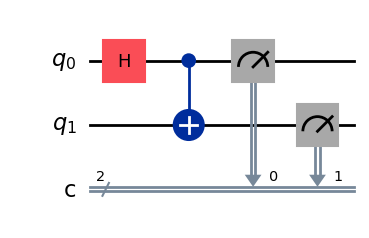

In [ ]:
qc.draw('mpl', style='iqx')

# What You’ll See
# A 2-qubit circuit diagram: